In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer

(CVXPY) Apr 15 04:46:35 PM: Encountered unexpected exception importing solver CVXOPT:
SystemError('initialization of lapack raised unreported exception')
(CVXPY) Apr 15 04:46:35 PM: Encountered unexpected exception importing solver GLPK:
AttributeError("partially initialized module 'cvxopt' has no attribute 'base' (most likely due to a circular import)")
(CVXPY) Apr 15 04:46:35 PM: Encountered unexpected exception importing solver GLPK_MI:
AttributeError("partially initialized module 'cvxopt' has no attribute 'base' (most likely due to a circular import)")


In [ ]:
##결측값을 대치하는 방법들은 다양하지만 우선은 기본적인 것들만 살펴보면서
##결측값을 대치하는 방법들의 차이를 이해하는 것을 학습의 목표로 생각하고 바라보자!
np.random.seed(0)
data= np.random.normal(10,2,100)

df = pd.DataFrame(data, columns= ['feature'])
df_sp= df.copy()

'''
np.random.normal(10, 2, 100)
→ 평균 10, 표준편차 2를 가진 정규분포에서 100개 값을 생성해요.

df: 원본 데이터 (결측값 없음)

df_sp: 분석용 복사본 (여기에 결측값 넣고 실험할 거예요)
'''

In [ ]:
#결측치를 만들어 보자!
df.loc[5:10, 'feature'] = np.nan
df.loc[30:35, 'feature'] = np.nan
df.loc[40:55, 'feature'] = np.nan

'''
5~10번째와 30~35번째 그리고 40~55번째 데이터를 NaN으로 바꿨어요.

이게 바로 결측값(Missing Value).
'''

In [8]:
df_sp

,feature
0,13.528105
1,10.800314
2,11.957476
3,14.481786
4,13.735116
...,...
95,11.413146
96,10.021000
97,13.571741
98,10.253824


In [9]:
## na값을 어떤 식으로 대치할까?
df

,feature
0,13.528105
1,10.800314
2,11.957476
3,14.481786
4,13.735116
...,...
95,11.413146
96,10.021000
97,13.571741
98,10.253824


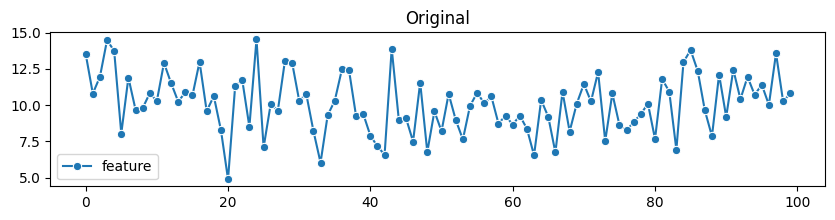

In [ ]:
#데이터 원본(결측제거) 데이터 시각화 
plt.figure (figsize=(10,2))
sns.lineplot(data=df_sp,marker='o')
plt.title('Original')
plt.show()
'''
🔍 코드 한 줄씩 분석
plt.figure(figsize=(10,2))
- 그래프의 전체 크기를 지정하는 코드.

- 가로 10인치, 세로 2인치로 길쭉한 형태의 그래프를 만듦.


sns.lineplot(data=df_sp, marker='o')
seaborn의 lineplot() 함수로 선 그래프를 그림.

- data=df_sp → 시각화할 데이터는 결측값이 포함된 복사본.

- marker='o' → 각 데이터 포인트를 점으로도 표시함.

즉, 점이 없으면 NaN이라는 뜻!
'''

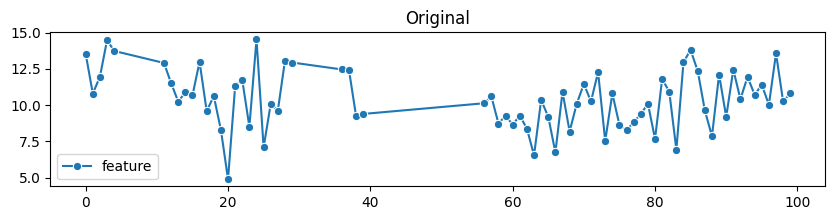

In [13]:
#데이터 원본(결측제거) 데이터 시각화
plt.figure(figsize=(10,2))
sns.lineplot(data=df,marker='o')
plt.title('Original')
plt.show()

In [16]:
#1. 1차 선형보간법, 데이터프레임.interpolate()
df_linear = df.interpolate(method='linear')

#2. 2차 선형보간법, interpolate
df_quadratic = df.interpolate(method='quadratic')

#3. 평균대치번 sklearn 패키지 사용
imputer_mean = SimpleImputer(strategy='mean')
df_mean = imputer_mean.fit_transform(df)
df_mean = pd.DataFrame(df_mean,columns=['feature'])

#4.0값으로 대치 fillna() na 값에 특정 값을 넣겠다 
df_zero = df.fillna(0)

#5. KNN 방법 
imputer_knn = KNNImputer(n_neighbors = 3)
df_knn = imputer_knn.fit_transform(df)
df_kn = pd.DataFrame(df_knn,columns=['feature'])

#6.MICE 다중대치법
mice_imputer = IterativeImputer()
df_mice = mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice,columns=['feature'])



Text(0.5, 1.0, 'df_mice')

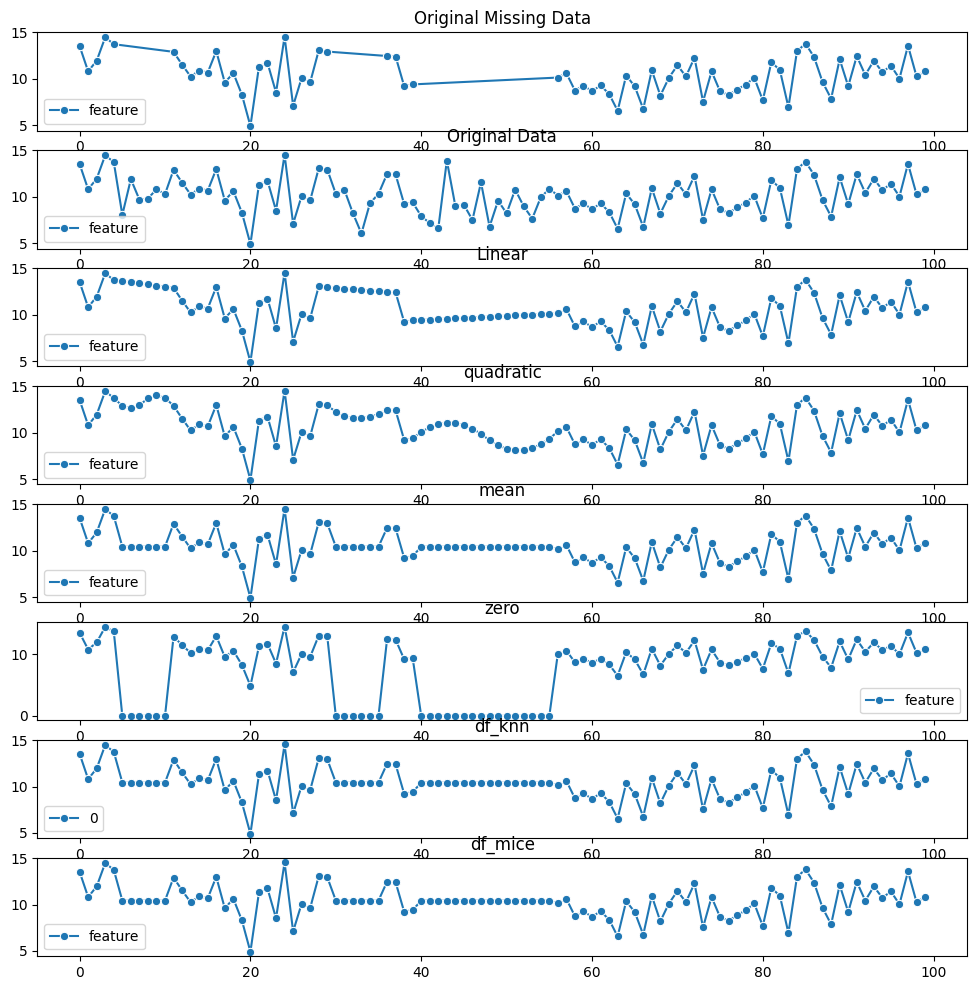

In [17]:
# 시각화로 어떤 식으로 대치가 되었는지 살펴보자! 
fig, axs = plt.subplots(8,1,figsize=(12,12))
sns.lineplot(data= df, marker='o',ax=axs[0], legend='auto')
axs[0].set_title('Original Missing Data')

sns.lineplot(data= df_sp, marker='o',ax=axs[1], legend='auto')
axs[1].set_title('Original Data')

sns.lineplot(data= df_linear, marker='o',ax=axs[2], legend='auto')
axs[2].set_title('Linear')

sns.lineplot(data= df_quadratic, marker='o',ax=axs[3], legend='auto')
axs[3].set_title('quadratic')

sns.lineplot(data= df_mean, marker='o',ax=axs[4], legend='auto')
axs[4].set_title('mean')

sns.lineplot(data= df_zero, marker='o',ax=axs[5], legend='auto')
axs[5].set_title('zero')

sns.lineplot(data= df_knn, marker='o',ax=axs[6], legend='auto')
axs[6].set_title('df_knn')

sns.lineplot(data= df_mice, marker='o',ax=axs[7], legend='auto')
axs[7].set_title('df_mice')

TypeError: 'Axes' object is not subscriptable

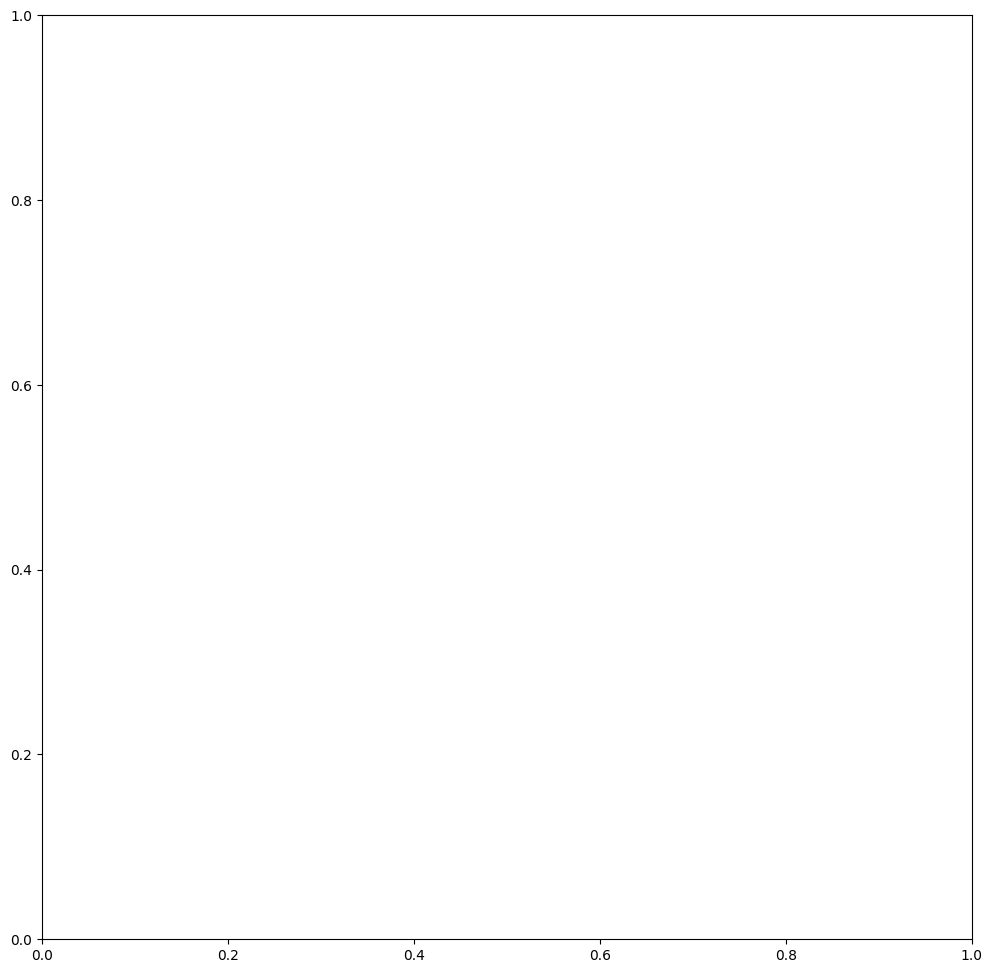

In [30]:
fig, axs = plt.subplots(1,figsize=(12,12))
sns.lineplot(data= df, marker='o',ax=axs[0], legend='auto')
axs[0].set_title('Original Missing Data')

'''
🔍 1. Original Missing Data (df)
- 결측값이 없는 원본 데이터.

- 기준이 되는 참값(ground truth) 역할을 합니다.

- 이후 다른 그래프들과 비교해서, 
얼마나 대치된 데이터가 원래의 흐름을 잘 복원했는지 판단합니다.
''' 

✅ 전체 구조
fig, axs = plt.subplots(8, 1, figsize=(12, 12))
fig, axs: 그래프 창(fig)과 여러 개의 subplot 축 배열(axs)을 생성.

8, 1: 세로로 8줄짜리 그래프를 만든다는 뜻.

axs[0]부터 axs[7]까지 총 8개의 그래프 축이 생성돼.

figsize=(12, 12): 전체 창의 크기 (가로 12, 세로 12인치)

data: 시각화할 데이터프레임 (결측 처리 방식에 따라 다름)

marker='o': 데이터 점들을 동그라미로 표시

ax=axs[n]: n번째 그래프에 그림

set_title(...): 그래프 위에 제목 붙임

axs[0]: 첫 번째 그래프


Text(0.5, 1.0, 'Original Data')

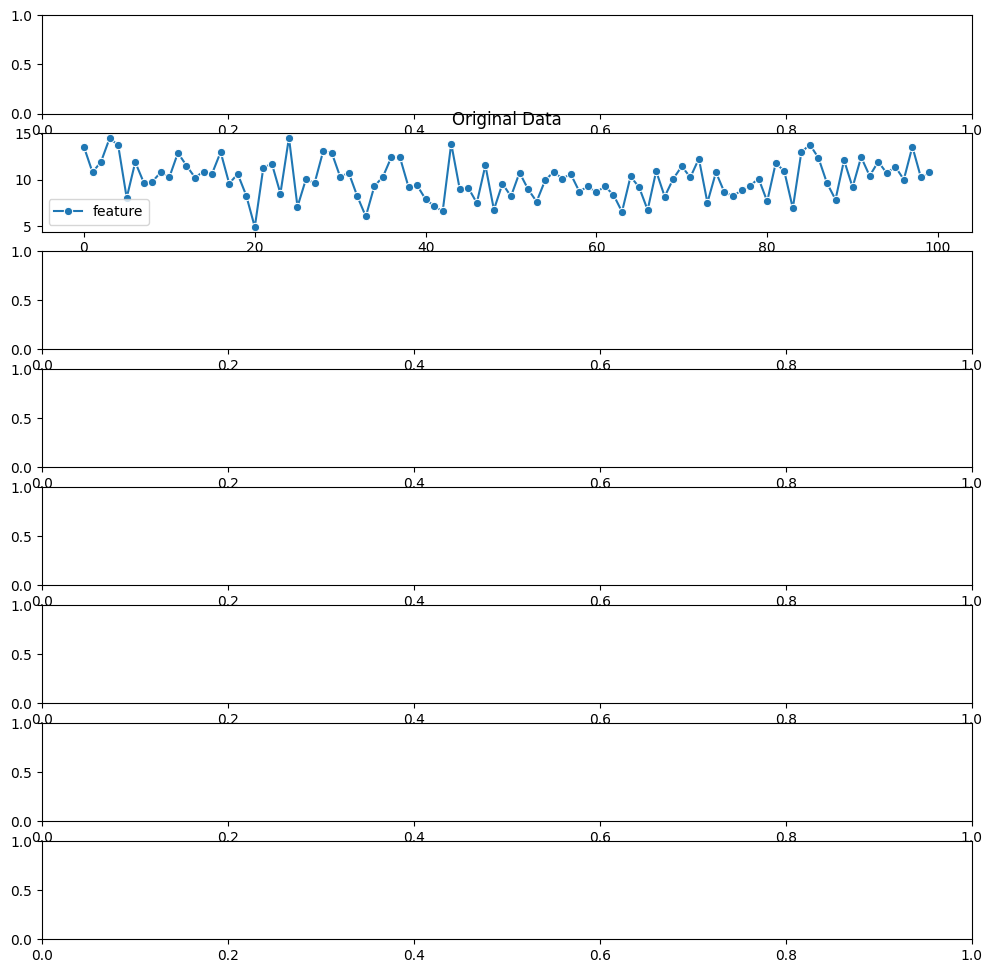

In [ ]:
fig, axs = plt.subplots(8,1,figsize=(12,12))
sns.lineplot(data= df_sp, marker='o',ax=axs[1], legend='auto')
axs[1].set_title('Original Data')

'''
🔍 2. Original Data with Missing (df_sp)
- 결측값이 포함된 데이터입니다.

- 여기에서 결측된 부분은 선이 끊겨 있거나 빈 구간으로 나타납니다.

- 결측 대치가 필요한 이유를 시각적으로 보여줍니다.
'''

Text(0.5, 1.0, 'Linear')

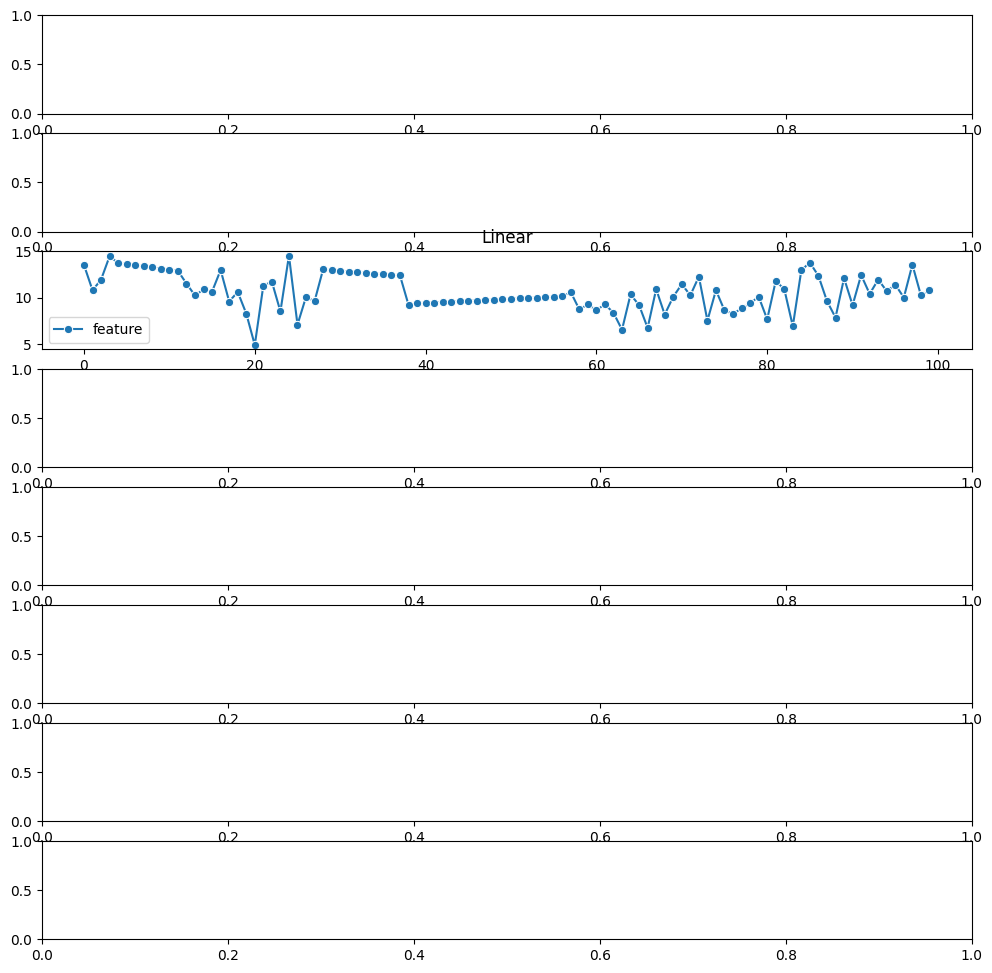

In [ ]:
fig, axs = plt.subplots(8,1,figsize=(12,12))
sns.lineplot(data= df_linear, marker='o',ax=axs[2], legend='auto')
axs[2].set_title('Linear')
'''
🔍 3. Linear Interpolation (df_linear)
- 결측 구간을 선형 보간법으로 채움.

- 값들이 선형으로 자연스럽게 이어짐.

- 단순한 추세일 경우 적절하지만, 
데이터가 비선형 패턴을 가질 경우 왜곡 가능성 있음.
'''

Text(0.5, 1.0, 'quadratic')

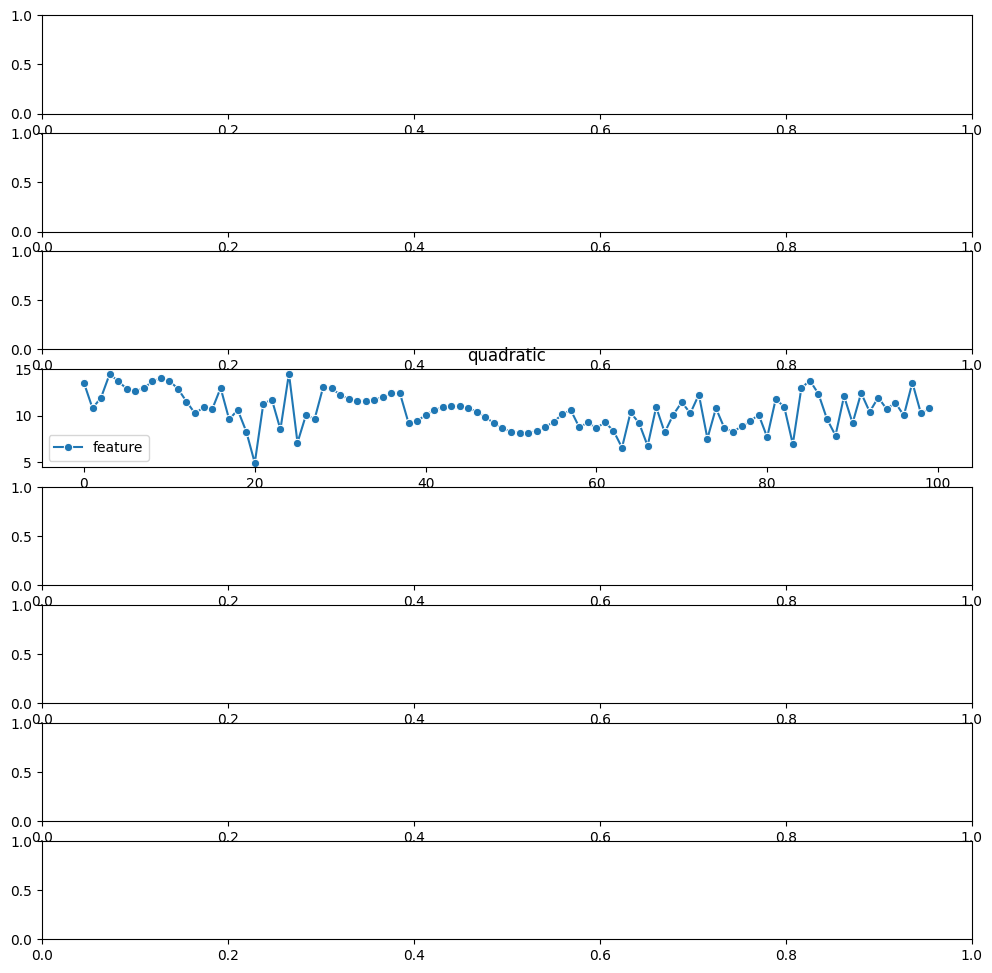

In [ ]:
fig, axs = plt.subplots(8,1,figsize=(12,12))
sns.lineplot(data= df_quadratic, marker='o',ax=axs[3], legend='auto')
axs[3].set_title('quadratic')

'''
🔍 4. Quadratic Interpolation (df_quadratic)
- 2차 함수 형태로 보간.

- 비선형적인 변화가 있는 경우 더 잘 맞을 수 있음.

- 하지만 과적합(overfitting)처럼 과하게 튈 수 있으므로 주의 필요.
'''

Text(0.5, 1.0, 'mean')

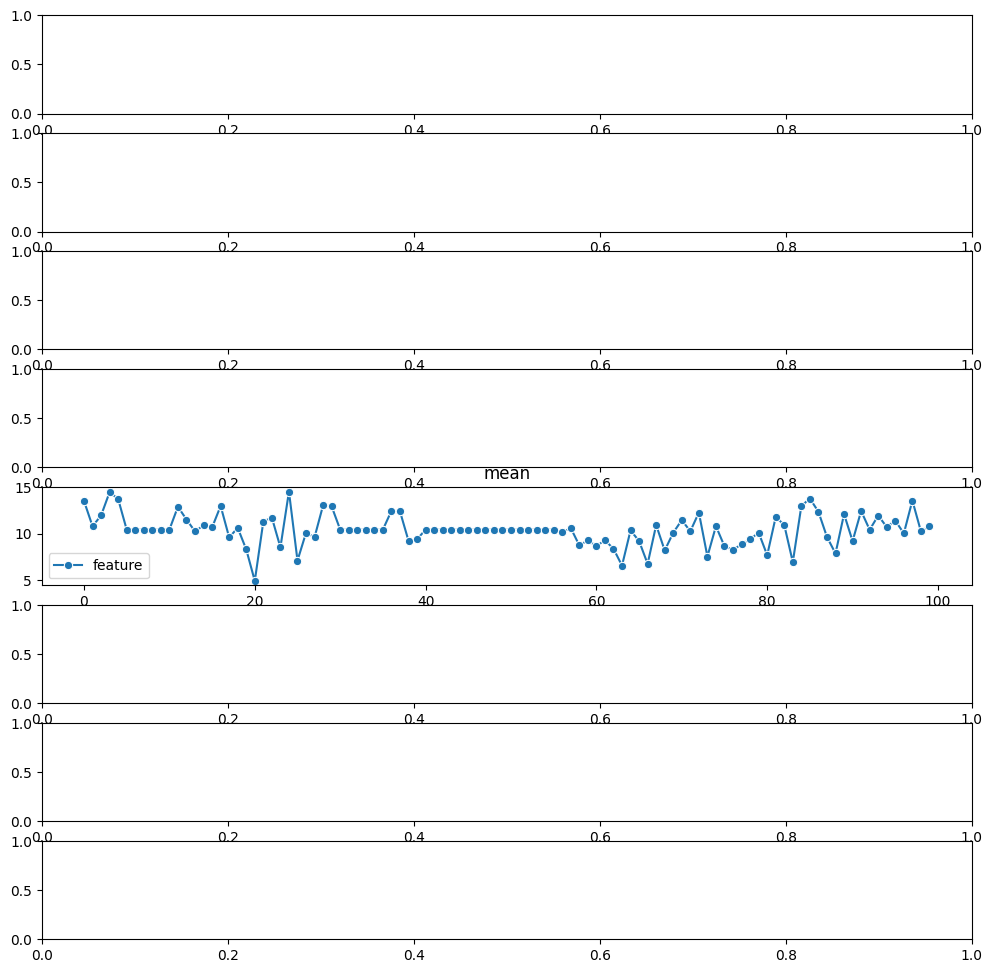

In [ ]:
fig,axs = plt.subplots(8,1,figsize=(12,12))
sns.lineplot(data= df_mean, marker='o',ax=axs[4], legend='auto')
axs[4].set_title('mean')

'''
🔍 5. Mean Imputation (df_mean)
- 결측값을 평균으로 대체.

- 모든 결측 구간이 동일한 값으로 채워지기 때문에 데이터의 분산이 
왜곡될 수 있음.

- 추세를 따르지 않기 때문에 실제 흐름을 잘 반영하지 못하는 경우도 있음.
'''

Text(0.5, 1.0, 'zero')

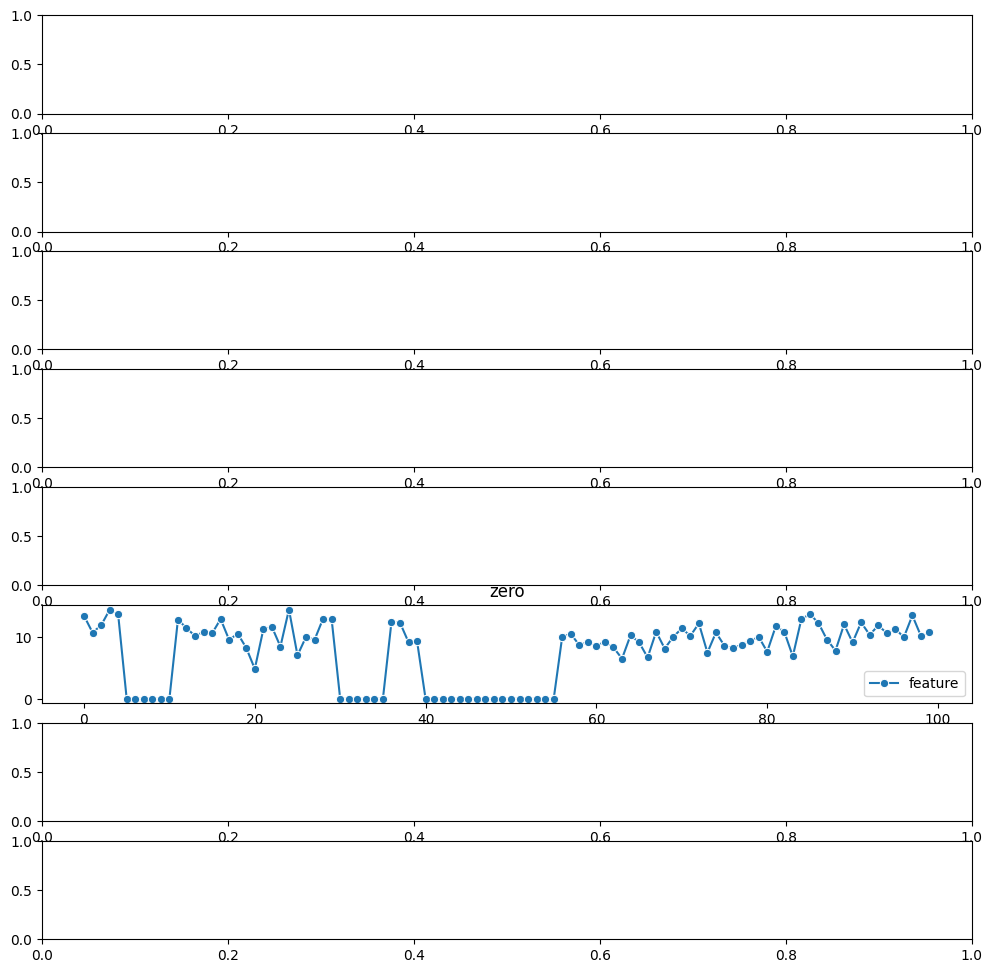

In [ ]:
fig,axs = plt.subplots(8,1,figsize=(12,12))
sns.lineplot(data= df_zero, marker='o',ax=axs[5], legend='auto')
axs[5].set_title('zero')
''' 
🔍 6. Zero Imputation (df_zero)
- 결측값을 0으로 대체.

- 데이터의 특성에 따라 매우 부자연스러울 수 있음.

- 실제 데이터 흐름을 반영하지 못함 → 이상치로 작용할 수 있음.
'''

Text(0.5, 1.0, 'df_knn')

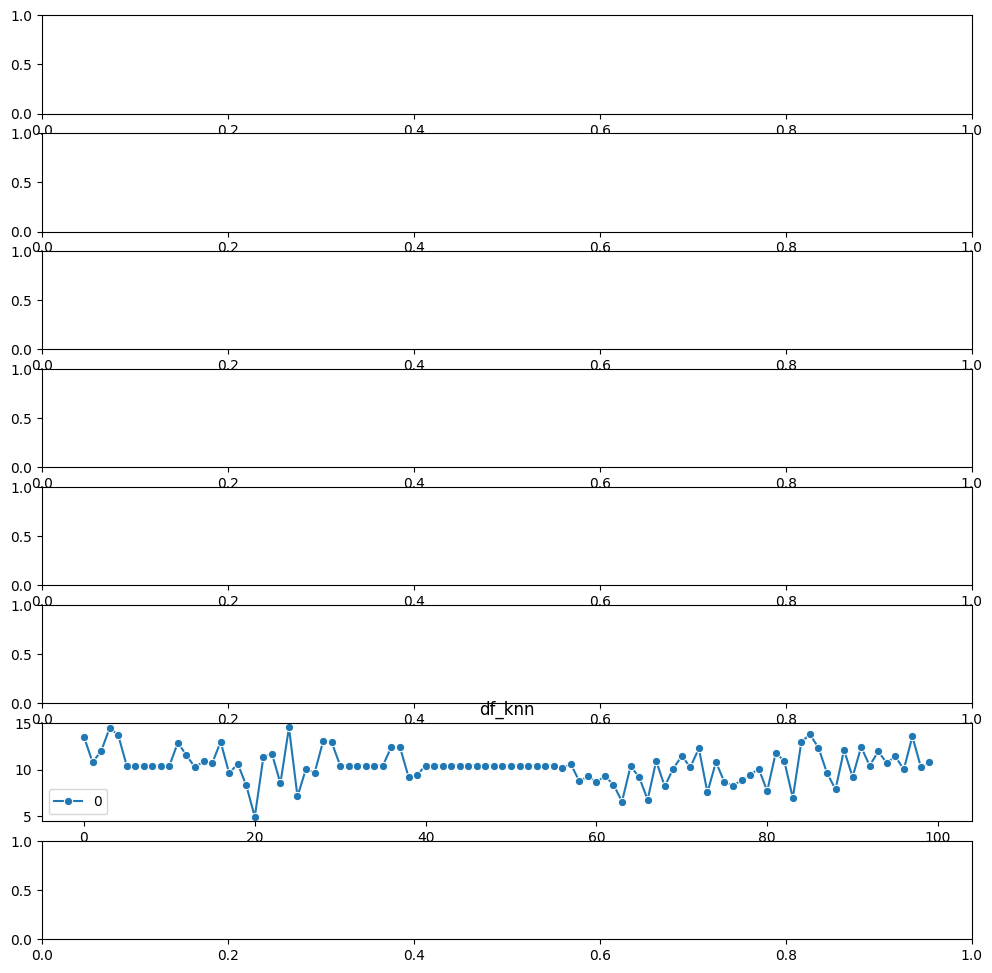

In [ ]:
fig,axs =plt.subplots(8,1,figsize=(12,12))
sns.lineplot(data= df_knn, marker='o',ax=axs[6], legend='auto')
axs[6].set_title('df_knn')
'''
🔍 7. KNN Imputation (df_knn)
K-최근접 이웃 알고리즘을 이용하여 결측값을 예측.

주변 데이터와의 유사성을 고려하기 때문에 자연스러운 결과가 가능함.

단점은 계산 비용이 크고, 이상치가 많을 경우 영향을 많이 받을 수 있음.
'''

Text(0.5, 1.0, 'df_mice')

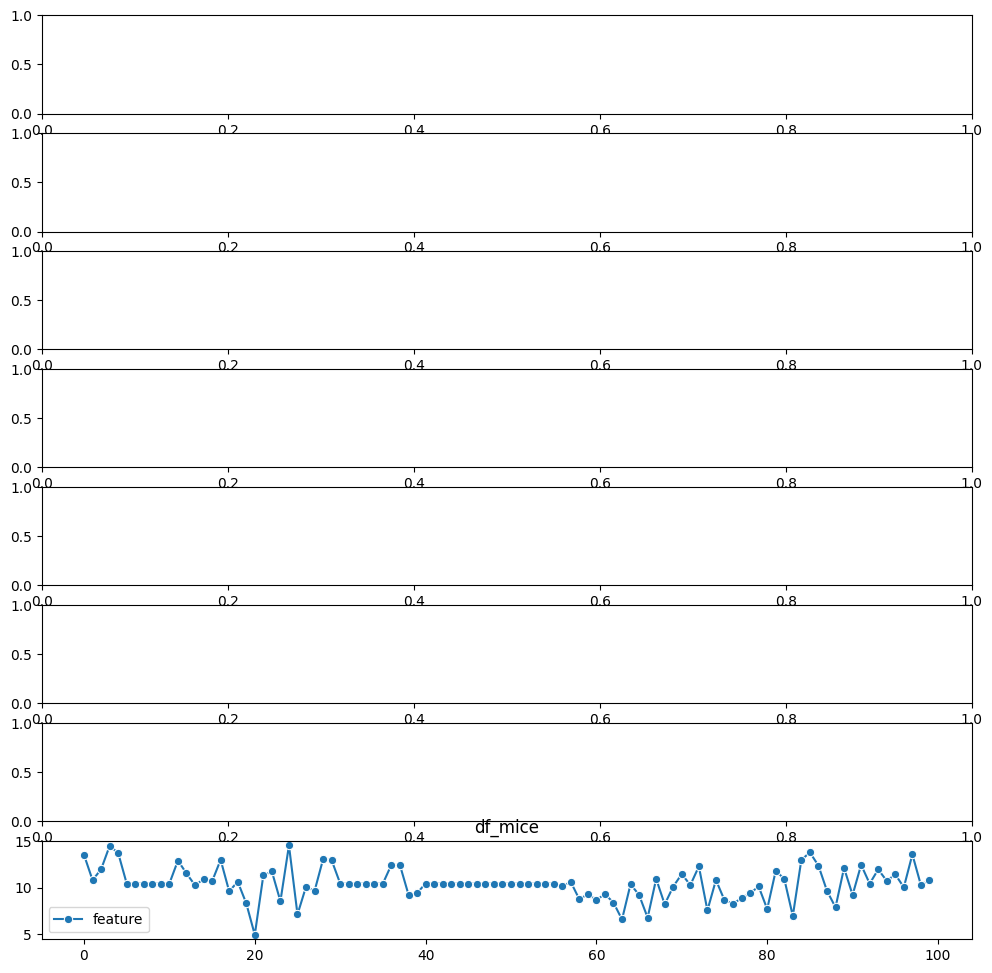

In [ ]:
fig,axs=plt.subplots(8,1,figsize=(12,12))
sns.lineplot(data= df_mice, marker='o',ax=axs[7], legend='auto')
axs[7].set_title('df_mice')
'''
🔍 8. MICE Imputation (df_mice)
- 다중 대체법(Multiple Imputation by Chained Equations).

- 각 변수의 상관관계를 고려하여 결측값을 반복적으로 추정.

- 일반적으로 가장 통계적으로 정교하고 신뢰할 수 있는 방법 중 하나.

- 단점은 구현 복잡성과 계산 비용.
'''

In [ ]:
'''
💡 최종 인사이트 정리:
데이터가 단순한 추세일 경우: linear 또는 quadratic 보간이 자연스럽고 적절함.

데이터가 복잡하고 변수 간 상관관계가 존재한다면: KNN 또는 MICE와 같은 고급 기법이 더 나은 선택.

mean/zero imputation은 편리하지만 정확도 면에서 가장 낮은 수준일 수 있으며, 분산 왜곡이나 패턴 무시 등의 문제가 있음.
'''